<a href="https://colab.research.google.com/github/angeloBuso/Airbnb_analise_dados/blob/main/Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Imagem" width="100%" src="https://raw.githubusercontent.com/angeloBuso/angeloBuso/main/image/Imagem2-notebook.png">

---

# Explorando dados do Airbnb para o *Rio de Janeiro*

O [Airbnb](https://www.airbnb.com.br/d/howairbnbworks) é uma comunidade global de viagens, que permite encontrar acomodações para todos os tipos de viagens. Segundo a [Forbes](https://forbes.com.br/listas/2019/05/global-2000-os-maiores-grupos-hoteleiros-em-2019/) o Airbnb têm se revelado concorrente de peso aos **grandes grupos hoteleiros** e o detalhe é que o Airbnb **não possui nenhum hotel**!

Usando *Plataforma* inovadora como serviço, conecta os seus *usuários* que querem viajar e necessitam de uma hospedagem, aos *anfitriões* que querem alugar seus imóveis de uma maneira prática e rápida. Sendo assim, o Airbnb viabiliza essa hospedagem alternativa, prática e rápida.

<img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"> nasceu em 2007, quando dois anfitriões deram as boas-vindas a três hóspedes em sua casa em São Francisco (USA), e desde então cresceu para **4 milhões de anfitriões** que receberam mais de **800 milhões de visitantes** em quase todos os países do mundo até final de 2020, desafiando as redes *hoteleiras tradicionais*.

Um dos pilares do Airbnb é a sua cultura aberta de dados (*open data*), disponibilizando os dados do site de algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível consultar, baixar e explorar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

**Neste *notebook*, iremos analisar os dados referentes à cidade Maravilhosa do Rio de Janeiro e ver quais insights podemos extrair a partir destes dados brutos.**

<img alt="Imagem" width="100%" src="https://raw.githubusercontent.com/angeloBuso/Airbnb_analise_dados/main/image/agustin-diaz-gargiulo-7F65HDP0-E0-unsplash-1.png">

<span><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">Foto de </font></font><a href="https://unsplash.com/@agustindiazg?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">Agustin Diaz Gargiulo</font></font></a><font style="vertical-align: inherit;"></span>

## 1. Compreensão Problema de Negócio
Usando a mentalidade de *open data* da Airbnb, extraindo um dataSet do repositório do Inside Airbnb, que trazem informações de **anúncios dos anfitriões**, gostaríamos de compreender alguns comportamentos como
* Quais as principais formas de locação.
* Quais bairros possuem maior oferta de hospedagem. 
* Desses bairros, qual valor médio da hospedagem.
* Além de mapear qual a média de dias de hospedagem na Cidade Maravilhosa.

In [1]:
# importar os pacotes necessarios para projeto
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 2. Obtenção dos Dados

Os dados para a presente análise, foram extraídos do reposítório da [Inside Airbnb](https://http://insideairbnb.com/about.html). Um projeto independente e não comercial que compila os dados fornecidos pela plataforma do Airbnb, que permite transforma em informações e compreender como o Airbnb está sendo utilizado em cidades ao redor do mundo. O formato dos dados permite sua extração direto pelos links do site. Para o Brasil temos apenas as informações da cidade do Rio de Janeiro e a data de compilação foi de 26/01/2021 (última versão até a produção desta análise). Como alternativa os dados em formato `.csv` disponibilizei no repositório do [GitHub](https://raw.githubusercontent.com/angeloBuso/Airbnb_analise_dados/main/dataSet/airbnb_rj_26012021.csv), caso queiram replicar com o mesmo dataSet.

### 2.1 Carga dos dados

In [2]:
dados = "http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-01-26/visualisations/listings.csv"
df = pd.read_csv(dados)

### 2.2 Dicionários dados
Uma boa-prática é construir um dicionário de dados, com uma descrição do que cada variável representa.

* id - Número de identificação gerado para o anúncio
* name - Descrição do anúncio
* host_id - Número de identificação do anfitrião (proprietário) do anúncio
* host_name - Nome do anfitrião
* neighbourhood_group - Região do bairro do anúncio
* neighbourhood - Nome do bairro
* latitude - Coordenada da latitude da propriedade
* longitude - Coordenada da longitude da propriedade
* room_type - Tipo de acomodação que é oferecida
* price - Preço para alugar o imóvel
* minimum_nights - Quantidade mínima de noites para reservar
* number_of_reviews - Número de avaliações que a propriedade possui
* last_review - Data da última avaliação
* reviews_per_month - Quantidade de avaliações por mês
* calculated_host_listings_count - Quantidade de anuncios diferentes do mesmo anfitrião
* availability_365 - Número de dias de disponibilidade dentro de 365 dias

## 3. Análise Exploratória dos Dados

Visão geral do dataSet que iremos realizar nossas análises

In [3]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,201,5,258,2020-12-26,2.01,1,286
1,25026,Beautiful Modern Decorated Studio in Copa,3746246,Ghizlane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,2020-02-15,1.84,11,357
2,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,273,2,181,2020-03-15,2.05,1,300
3,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,135,3,350,2021-01-24,2.79,1,84
4,41198,"Modern 2bed,Top end of Copacabana",178975,Nicky,NaN,Copacabana,-22.97962,-43.19230,Entire home/apt,492,3,18,2016-02-09,0.19,2,365
5,48305,"Beach Block 6bed Penthouse, Ipanema Best Locat...",70933,NaN,NaN,Ipanema,-22.98599,-43.20299,Entire home/apt,1752,2,77,2021-01-09,0.64,5,346
6,48726,Rio de Janeiro Copacabana Ipanema,221941,Vana,NaN,Ipanema,-22.98414,-43.19450,Private room,108,3,42,2019-08-08,1.07,1,90
7,48901,Confortable 4BD 3.5BT Atlantic avenue,222884,Marcio,NaN,Copacabana,-22.96574,-43.17514,Entire home/apt,587,4,4,2020-03-08,0.06,2,144
8,49179,Djalma Ocean View Studio with Amazing Views #100A,224192,David,NaN,Copacabana,-22.97910,-43.19008,Entire home/apt,156,3,92,2021-01-25,0.92,38,179
9,50294,Beach Block Suites in Ipanema Best Location,70933,NaN,NaN,Ipanema,-22.98584,-43.20305,Entire home/apt,654,3,73,2020-09-20,0.63,5,345


### 3.1 Visão descritiva do nosso dataSet

Observando algumas informções sobre os dados identificamos quantos atributos/variáveis iremos trabalhar, bem como quantos registros possui nosso conjunto de dados. Uma informação importante é verificar quais os tipos das nossas variáveis, confirmar "informação" que a variável transmite condiz com sua representção. 

In [4]:
def visaogeral(df, message):
    print(f'{message}:\n')
    print("\nQtd Atributos/Variáveis:", df.shape[1])
    print("\nQtd Registros/Observações:", df.shape[0])
    print("\nEm formato Tabular temos {} colunas e {} linhas."\
          .format(df.shape[1], df.shape[0]))     
    print("\nAtributos:")
    print(df.columns.tolist())
    print("\nQtd Valores missing:", df.isnull().sum().values.sum())
    print("\nValores Únicos (Indicativo de var_Cat):")
    print(df.nunique())
    print("\nAtributos são do tipo:")
    print(df.dtypes)

In [5]:
visaogeral(df,"Visão Geral do dataSet")

Visão Geral do dataSet:


Qtd Atributos/Variáveis: 16

Qtd Registros/Observações: 26106

Em formato Tabular temos 16 colunas e 26106 linhas.

Atributos:
['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Qtd Valores missing: 45434

Valores Únicos (Indicativo de var_Cat):
id                                26106
name                              25411
host_id                           17153
host_name                          5107
neighbourhood_group                   0
neighbourhood                       151
latitude                           9822
longitude                         12184
room_type                             4
price                              1723
minimum_nights                       67
number_of_reviews                   272
last_review                        1444
rev

Os dados possuem 16 variáveis (ou colunas), cerca de 26 mil registros. Observamos uma grande quantidade de valores faltantes, fato que será investigado melhor mais a frente. Neste dataSet encontramos valores categóricos (indicam classes - `object`) e valores numéricos.

Vamos explorar esses dados!!!


### 3.2 Investigar os valores ausentes

A qualidade das análises em Data Science é proporcional a qualidade do dataSet. Que por sua vez tem relação com a quantidade de registros ausentes.
Valores Missing, como são conhecidos, podem ter naturezas diversas, desde falhas de registros na origem dos dados, até a própria manipulação pelo cientista de dados.
Não existe receita mágica para tratar valores missing, devemos observar o contexto dos dados e aplicar as melhores práticas de imputação.

Neste dataSet com dados do Airbnb da cidade do Rio de Janeiro, nota-se que a variável `neighbourhood_group` (vide 2.2 Dic. dados) está completamente sem informações.

In [6]:
(df.isnull().sum()).sort_values(ascending = False)

neighbourhood_group               26106
reviews_per_month                  9641
last_review                        9641
name                                 29
host_name                            17
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
host_id                               0
id                                    0
dtype: int64

Em proporção com o total de registros, o percentual de valores ausentes para cada atributo é apresentado abaixo.

In [7]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending = False)

neighbourhood_group               100.000000
reviews_per_month                  36.930208
last_review                        36.930208
name                                0.111086
host_name                           0.065119
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

### 3.3 Distribuição dos dados nas variáveis 

Cada variável/coluna numérica possui um conjunto de informações, que são seus registros, o que aquela coluna representa. Usando uma das ferramentas visuais da estatística descritiva, os histogramas, conseguimos identificar a forma como estão distribuidos as frequências dos dados em cada atributo numérico. Sendo assim, é possível identificar possíveis *outlier's*, que distorcem a realidade dos dados, valores que tendem a distribuição ao extremo.

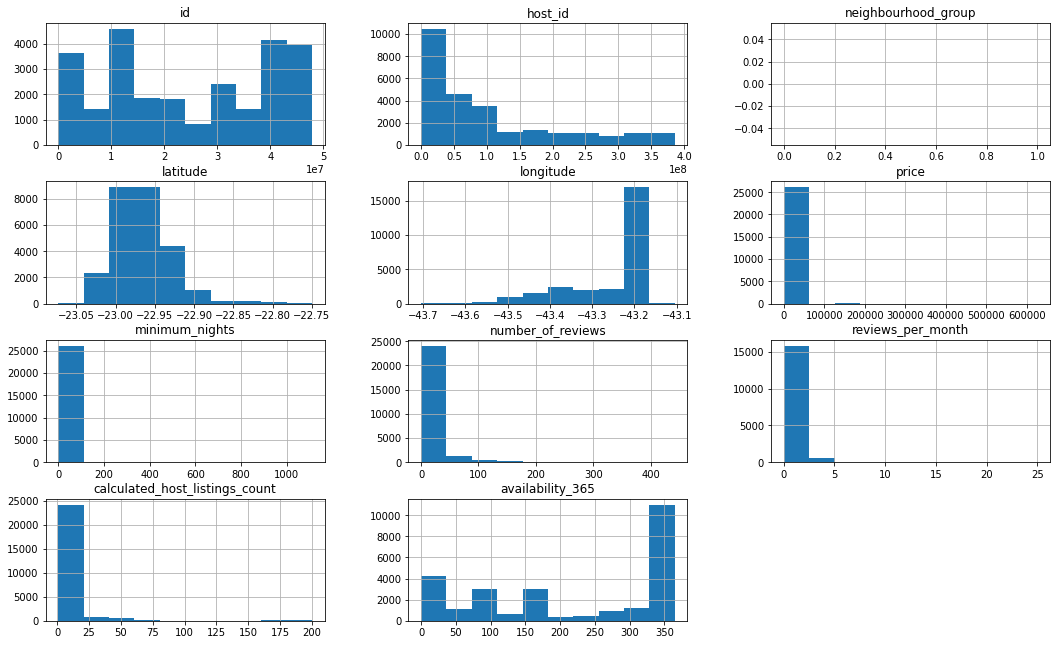

In [8]:
plt.rcParams["figure.figsize"] = (18,11)
df.hist();

Entretanto não são todas as colunas/atributos numéricos que nos interessa nessa análise. Abaixo é apresentado apenas as variáveis que iremos focar, colocar uma lupa!!

In [9]:
# df[['price', 'minimum_nights', 'number_of_reviews',
#              'reviews_per_month','calculated_host_listings_count',
#              'availability_365']].hist();

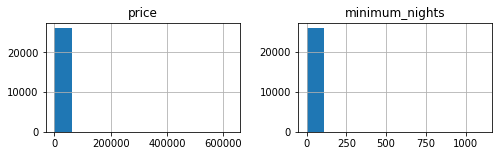

In [10]:
plt.rcParams["figure.figsize"] = (8,2)
df[['price', 'minimum_nights']].hist();

A distribuição nos histogramas das variáveis `price` e  `minimum_nights`, mostram indícios de valores conhecidos como *outlier's*, que distorcem a realidade das nossas informações e acarreta decisões enviesadas. Os valores no eixo X de cada histograma, apontam observações de nesses intervalos apresentados nesse horizontal do gráfico.

Visualizando um resumo estatístico descritivos, poderemos verificar.

In [11]:
round(df[['price', 'minimum_nights']].describe().transpose(),1)

,count,mean,std,min,25%,50%,75%,max
price,26106.0,730.8,5149.4,0.0,160.0,294.0,591.0,626623.0
minimum_nights,26106.0,4.8,20.2,1.0,1.0,2.0,4.0,1111.0


#### 3.3.1 Análise variável -Preço-
O resumo estatístico da variável `price` informa que a média do preço é de 730,80 com um desvio padrão de 5.149,40. Em relação a média o valor do desvio padrão é bastante alto, pois o desvio padrão mensura o quão distantes os pontos de dados estão da média dos dados. Um outro indicativo é que 75% dos dados estão entre o valor mínimo 0,00 e 591,00. Por fim, o valor máximo observado no atributo é de 626.623,00. Indicando que provávelmente esse atributo possui valores considerados outlier's.

**Mais a pergunta é quantos e quais valores foram considerados outlier's?**

Usando outra ferramente da estatística descritiva visual, boxplot's, podemos responder tal indagação.
Mas antes, iremos assumir como **premissa** que qualquer valor do atributo `price` que for $ 2 * (média 730.8) = 1.461,60 $ será considerado um outlier.

**Importante:** premissas assumidas ao longo da análise de *Data Science* diz respeito ao contexto em que seus dados estão, ou seja, cada *data scientist* assumirá suas premissas e tomará suas decisão com base em seus *background* e conhecimento das regras de negócios, que cada problema exige.

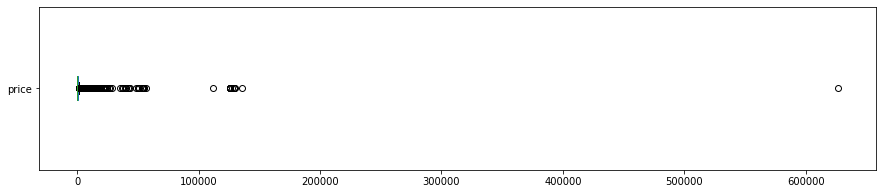

A quantidade de registros com preço acima de R$ 1461.6 são:
2097 registros
representa 8.032636175591817%


In [12]:
outlier = 1461.60

plt.rcParams["figure.figsize"] = (15,3)
df.price.plot(kind = "box", vert = False)
plt.show()

print("A quantidade de registros com preço acima de R$ {} são:".format(outlier))
print("{} registros".format(len(df[df.price > outlier])))
print("representa {}%".format((len(df[df.price > outlier]) / df.shape[0])*100))

#### 3.3.2  Análise variável -Mínimo Estadias-

O resumo estatístico da variável `minimum_nights` informa que a média da quantidade mínimas de estadias são de aproximadamente 5 dias com um desvio padrão de 20 dias. Os dados estão com um desvio padrão relativamente alto do ponto médio dos dados. Temos que a período máxima de estadias observadas na variável foi de 1111 dias, que dá um **pouco mais de 3 anos.?!?!?**. Ainda nota-se que 75% dos dados encontram-se entre o valor mínimo de 1 dia à 4 dias de quantidades mínimas de estadias. O que indica que no atributo há valores considerados outlier's.

Usaremos a mesma abordagem da variável preço. Assimiremos como **premissa** que valores **acima de 30 dias** de quantidade mínima de hospedagem, será considerado um outlier!

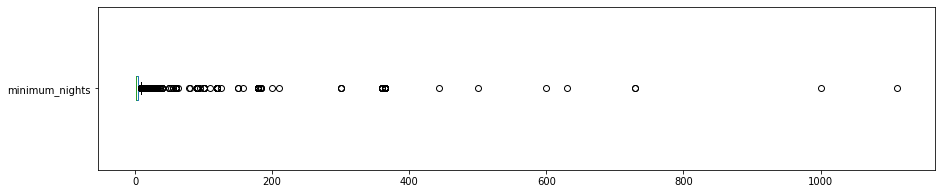

A quantidade mínima de dias por estadia, com valores acima de 30 dias são: 
197 registros
representam 0.7546% de registros do dataSet


In [13]:
df.minimum_nights.plot(kind = 'box', vert = False)
plt.show()

# ver quantidade de valores acima de 30 dias
print("A quantidade mínima de dias por estadia, com valores acima de 30 dias são: ")
print("{} registros".format(len(df[df.minimum_nights > 30])))
print("representam {:.4f}% de registros do dataSet".format((len(df[df.minimum_nights >30]) / df.shape[0]) *100))

## 4. Pré Processamento dos dados
Nesta etapa realizaremos *Feature engineer*, ou seja, engenharia de atributos. Após um processo de exploração nos dados, identificando como estão as distribuições dos dados nos atributos, as quantidades de valores ausentes, entre outras, podemos coletar informações que nos ajudarão a decidir que passos realizaremos para pré-processar os dados.

As premissas apontadas para a indicação dos pontos de corte para identificar os valroes que distorcem a realidade dos dados (*outlier's*) mostraram-se assertivas. Tais valores possuem uma representação pequena no conjunto de dados e sua exclusão permitirá regularizar as possíveis distorções ocasionadas.

Uma terceira premissa que iremos assumir é remover do dataSet a variável `neighbourhood_group` que possui 100% de valores missing, apenas como forma de reduzir a dimensionalidade dos dados. Como o objetivo desse *jupyter* é apenas explorar as variáveis `price` e `minimum_nights`, os demais atributos que possuem valores ausentes serão preservados.


### 4.1 Limpeza nos dados
Como boa prática, manteremos o dataSet original preservado. Iremos copiar o dataSet original e remover os registros dos atributos `price` e `minimum_nights` que foram considerados *outlier's*.

In [14]:
df_etl = df.copy()
df_etl.drop(df_etl[df_etl.price > outlier].index, axis= 0, inplace= True)
df_etl.drop(df_etl[df_etl.minimum_nights > 30].index, axis= 0, inplace= True)

In [15]:
print("DataSet original:", df.shape)
print("DataSet limpo:", df_etl.shape)

DataSet original: (26106, 16)
DataSet limpo: (23836, 16)


In [16]:
# eliminando coluna vazia
df_etl.drop('neighbourhood_group', axis=1, inplace= True)

In [17]:
print("DataSet original:\t", df.shape)
print("DataSet limpo:\t\t", df_etl.shape)

DataSet original:	 (26106, 16)
DataSet limpo:		 (23836, 15)


-----
Após o processo de limpeza dos dados, a distribuição nas frequências dos dados ficaram mais claras !!

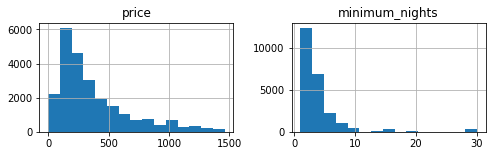

In [18]:
plt.rcParams["figure.figsize"] = (8,2)
df_etl[['price', 'minimum_nights']].hist(bins=15);

### 4.2 Análise dos dados

#### 4.2.1 Média dos preços das diárias ofertadas

Com dataSet sem a distorção dos *outlier's*, identificamos que a média das diárias anunciada para a cidade do Rio de Janeiro, até a ultima compilação (em 26/01/2021) é de 363,80.

In [19]:
df_etl.price.describe()

count    23836.000000
mean       363.807854
std        293.154334
min          0.000000
25%        150.000000
50%        260.000000
75%        488.000000
max       1460.000000
Name: price, dtype: float64

O preço médio das diárias é de R$363.81. 


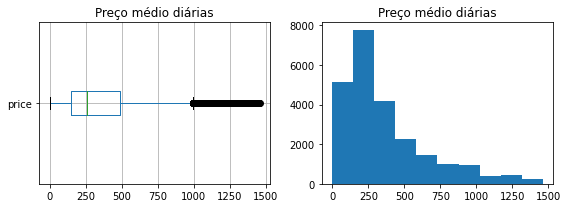

In [20]:
fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize= (8,3))

df_etl.boxplot('price', ax= ax[0], vert= False)
ax[0].set_title('Preço médio diárias')

ax[1].hist('price', data= df_etl)
ax[1].set_title('Preço médio diárias')

plt.tight_layout()
print('O preço médio das diárias é de R${}. '\
      .format(round(df_etl.price.mean(), 2)))

Interessante ressaltar que mesmo retirando do dataSet os registros considerados como *outlier* para o preço da diária, o boxplot considerou que valores superiores a 1000.00 foram considerados como outlier's.


---



#### 4.2.2 Média do mínimo de noites para aluguel
Identificamos que a média das quantidades mínimas das diárias anunciada, até a ultima compilação (em 26/01/2021), é de cerca de 3 noites na Cidade Maravilhosa.

In [21]:
df_etl.minimum_nights.describe()

count    23836.000000
mean         3.454397
std          4.139661
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         30.000000
Name: minimum_nights, dtype: float64

A média de quantidades mínimas para loação é de 3.0 noites.


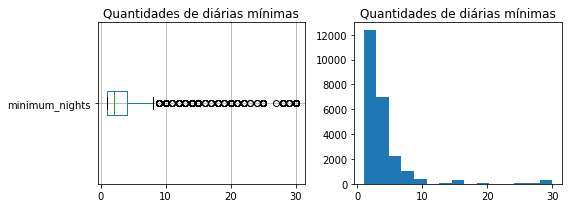

In [22]:
fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize= (8,3))

df_etl.boxplot('minimum_nights', ax= ax[0], vert= False)
ax[0].set_title('Quantidades de diárias mínimas')

ax[1].hist('minimum_nights', data= df_etl, bins= 15)
ax[1].set_title('Quantidades de diárias mínimas')

plt.tight_layout()
print('A média de quantidades mínimas para loação é de {} noites.'\
      .format(round(df_etl.minimum_nights.mean(), 0)))

Mesmo padrão já observado, a ferramenta de boxplot considerou que valores superiores a 8 dias já poderão ser considerados *outlier's*.


---

#### 4.2.3 Tipos de imóvel mais alugado no Airbnb
Uma das facilidades que atraem tanto os usuários como os anfitriões para a plataforma do Airbnb é a possibilidade de se aluguar um apartamento/casa inteira, ou fracionar os quartos desses imóveis. Bem como compartilhar quartos!!!

Desse dataSet do Rio de Janeiro iremos identificar quais são os principais tipos de locação ofertada, entre as opções disponíveis temos:
* `Entire home/apt` casa ou apartamento inteiro (toda a infraestrutura do imóvel).
* `Private room` apenas quarto, de forma individual.
* `Shared room` apenas quarto, no entanto compartilhado.
* `Hotel room` quarto em um Hotel.

In [23]:
df_etl.room_type.value_counts()

Entire home/apt    16821
Private room        6325
Shared room          585
Hotel room           105
Name: room_type, dtype: int64

Em percentual do total de anúncios, observa-se que 70% dos anúncios referem-se a **locação de todo o imóvel**. Hotéis tem experimentado anunciar no Airbnb, muito embora sem nenhuma expresividade na quantidade total de anúncios (menos de 1%).

In [24]:
(df_etl.room_type.value_counts() / df_etl.shape[0]) * 100

Entire home/apt    70.569726
Private room       26.535493
Shared room         2.454271
Hotel room          0.440510
Name: room_type, dtype: float64

In [25]:
# sns.countplot(df_etl['room_type'])

#### 4.2.4 Bairro mais caro para se hospedar

Podemos separar os dados por bairros, com a finalidade de descobrir qual bairro possui em média, o valor mais alto da diária.

Vamos descobrir???

A princípios temos uma concepção que os bairros famosos das **novelas das 9** daquele canal de TV, como o **Leblon**, **Copacabana**, **Ipanema** serão os mais caros para se hospedar... afinal podemos encontrar um **famoso** né!... vamos validar essa hipótese??

In [26]:
print("Os dados possuem ofertas em {} bairros.".format(len(df_etl.neighbourhood\
                                                          .unique())))

Os dados possuem ofertas em 150 bairros.


**E o mais caro são os:**

In [27]:
df_etl.pivot_table(['price'], ['neighbourhood'],
                   aggfunc= 'mean').sort_values(by= 'price' ,ascending = False)
# df_etl.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)

,price
neighbourhood,
Vista Alegre,1304.000000
Vaz Lobo,822.000000
Anchieta,800.000000
Freguesia (Ilha),747.000000
Osvaldo Cruz,610.000000
...,...
Coelho Neto,88.800000
Parque Anchieta,88.750000
Bonsucesso,84.500000


**É pelo visto a nossa hipótese falhou!!!**

#### 4.2.5 Validando resultados
Ocorre que, um bom cientista de dados **não deve dar como encerrado suas análises**, mesmo quando visualiza seus plot's, tabelas, sumarizações e resultado dos modelos preditivos. Devemos **confrontar esses output's** que produzimos, com a realidade dos fatos.

Temos que pesquisar, validar os resultados! Nessa análise dos dados do Airbnb do Rio de Janeiro, recebemos como resultado final que o bairro **Vista Alegre** possui, em média, a diária mais cara da cidade do Rio de Janeiro.

As praias no Rio de Janeiro são grandes pontos turísticos e a praia mais próxima do bairro **Vista Alegre** é a **Praia de Ramos**, cerca de 13 km de distância. O póximo resultado que obtivemos foi o bairro **Vaz Lobo** e a praia mais próxima, também é a **Praia de Ramos**, no entanto está a cerca de 16 km de distância.

Não sei vocês... mais eu até aceitaria pagar um pouco mais se estivesse apenas alguns metros da praia!!!

O que nos resta é checar melhor esse resultado!!

Consultando os registros específicos pelos bairros, constatamos que a quantidade de aúncios por bairro é de extrema relevância em nossa análise!! 

Se tomássemos como encerrada essa exploração, destes dados, estaríamos tomando decisões enviesadas.... mesmo já tendo feito a limpeza dos dados dos valores de *outlier's*. Por isso é importante entender sobre o contexto em que está analisando. 

Checando os anúncios do bairro *Vista Alegre* identificamos que o mesmo possui apenas 1 anúncio, dado que em todo dataSet temos 23.836 anúncios.

In [28]:
df_etl[df_etl.neighbourhood == "Vista Alegre"]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7917,13654995,Cozy colonial style room,79273288,Sérgio,Vista Alegre,-22.8286,-43.31916,Private room,1304,1,1,2016-08-05,0.02,1,365


In [29]:
df_etl.shape[0]

23836

Com o bairro **Vaz Lobo**, temos apenas 2 anúncios em relação a quantidade total de anúncios, que é de 23.836. Representa apenas 0,01%, não dando representatividade e nem sustentação para estar no topo da lista.

In [30]:
df_etl[df_etl.neighbourhood == "Vaz Lobo"]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9291,14221134,"casa colonial 3 quartos, garagem",86402266,Lucia,Vaz Lobo,-22.85696,-43.32432,Entire home/apt,1344,15,0,NaN,NaN,1,365
21194,42012781,Casas flegler,332881900,Igor Flegler De Souza,Vaz Lobo,-22.86057,-43.32320,Private room,300,1,0,NaN,NaN,1,362


#### 4.2.6 Ajustando os dados dado ao contexto
Contexto que utilizaremos será:

1.   Identificar a quantidade de anúncios por bairros;
2.   Ordenar por ordem decrescente.


In [31]:
df_etl.neighbourhood.value_counts().sort_values(ascending= False)

Copacabana         7064
Ipanema            2248
Barra da Tijuca    2235
Jacarepaguá        1207
Botafogo           1148
                   ... 
Anchieta              1
Vista Alegre          1
Cavalcanti            1
Cacuia                1
Zumbi                 1
Name: neighbourhood, Length: 150, dtype: int64

#### 4.2.7 Obtendo novo dataSet
Agrupando os dados por bairros e identificando a quantidade total de anúncios, identifica-se que há uma distância entre essas quantidades. O bairro que mais anuncia, Copacabana, possui 7.064 anúncio, ao passo que 72 bairros possuem no máximo 10 anúncios

In [32]:
print("Ao todo temos {} bairros com no máximo 10 anúncios".\
      format(len(df_etl.neighbourhood.value_counts().loc[lambda x : x <= 10])))

Ao todo temos 72 bairros com no máximo 10 anúncios


##### 4.2.7.1 Top 20 bairros
Dado ao contexto dos dados, para realizar as devidas comparações de bairros com maior preço médio de diária, iremos separar do nosso dataSet limpo apenas as informações referentes dos 20 primeiros bairros que mais ofertam acomodações, um *top20*.

In [33]:
# identificando os bairros Top20 anúncios
# df_etl.neighbourhood.value_counts()[:20]
top20= list(df_etl.neighbourhood.value_counts()[:20].index)

In [34]:
# dataSet dos 20 bairros que mais anunciam aluguel

df_top20 = df_etl[df_etl['neighbourhood'].isin(top20)]
df_top20.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,Copacabana,-22.96592,-43.17896,Entire home/apt,201,5,258,2020-12-26,2.01,1,286
1,25026,Beautiful Modern Decorated Studio in Copa,3746246,Ghizlane,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,2020-02-15,1.84,11,357
2,35636,Cosy flat close to Ipanema beach,153232,Patricia,Ipanema,-22.98816,-43.19359,Entire home/apt,273,2,181,2020-03-15,2.05,1,300
3,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,Copacabana,-22.98127,-43.19046,Entire home/apt,135,3,350,2021-01-24,2.79,1,84
4,41198,"Modern 2bed,Top end of Copacabana",178975,Nicky,Copacabana,-22.97962,-43.19230,Entire home/apt,492,3,18,2016-02-09,0.19,2,365


##### 4.2.7.2 Bairro mais caro para se hospedar

Agora.. mantido a contextualização dos dados e considerando apenas os 20 primeiros bairros detentores de maior representatividade, podemos verificar qual bairro possui em média, o valor mais alto da diária.

Primeiro vamos consultar como está a média de todo os dados.


In [35]:
df_top20.price.describe()

count    20761.000000
mean       371.215259
std        291.377127
min          0.000000
25%        160.000000
50%        271.000000
75%        499.000000
max       1460.000000
Name: price, dtype: float64

O preço médio das diárias é de R$371.22. 


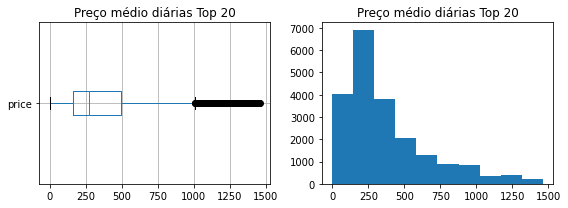

In [36]:
fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize= (8,3))

df_top20.boxplot('price', ax= ax[0], vert= False)
ax[0].set_title('Preço médio diárias Top 20')

ax[1].hist('price', data= df_top20)
ax[1].set_title('Preço médio diárias Top 20')

plt.tight_layout()
print('O preço médio das diárias é de R${}. '\
      .format(round(df_top20.price.mean(), 2)))

Agora, identificaremos por bairros!!

In [37]:
round(df_top20.groupby(['neighbourhood']).\
      price.mean().sort_values(ascending = False),2)

neighbourhood
Lagoa                       496.35
Leblon                      491.83
Ipanema                     465.97
Barra da Tijuca             455.16
Gávea                       425.84
Recreio dos Bandeirantes    425.11
Jacarepaguá                 409.70
Jardim Botânico             371.89
Copacabana                  343.95
Leme                        340.97
Camorim                     333.77
Laranjeiras                 309.94
Vila Isabel                 306.60
Flamengo                    297.43
Botafogo                    297.16
Tijuca                      283.31
Catete                      265.42
Glória                      265.05
Santa Teresa                254.34
Centro                      228.08
Name: price, dtype: float64

Se lembra da hipótese que acreditávamos que os bairros mais caros seriam os bairros de **novela da 9**.... então... Realmente os dados confirmam isso heim!!! Lembrando que a média de todo os dados do top 20 é de **371,22**

|     Bairro      | Vlr Diária(R$)|
|-----------------|-------------- |
|        Lagoa    | 496.35        |
| Leblon          | 491.83        |
| Ipanema         | 465.97        |
| Barra da Tijuca | 455.16        |
| Gávea           | 425.84        |

In [38]:
round(df_top20.groupby(['neighbourhood']).\
      price.mean().sort_values(ascending = False)[:5],2)

neighbourhood
Lagoa              496.35
Leblon             491.83
Ipanema            465.97
Barra da Tijuca    455.16
Gávea              425.84
Name: price, dtype: float64

##### 4.2.7.3 Mínimo de noites
A quantidade mínima, em média, para se hospedar nesses **Top 20** bairros são cerca de 4 noites (3,49 - arredondando para cima, até porque o Rio de Janeiro é muito lindo... tem que ser para mais dias...).

In [39]:
df_top20.minimum_nights.describe()

count    20761.000000
mean         3.499783
std          4.070088
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         30.000000
Name: minimum_nights, dtype: float64

Quantidade mínima de noites por bairros, temos:

In [40]:
round(df_top20.groupby(['neighbourhood']).\
      minimum_nights.mean().sort_values(ascending = False), 0)

neighbourhood
Glória                      5.0
Jacarepaguá                 4.0
Gávea                       4.0
Flamengo                    4.0
Camorim                     4.0
Lagoa                       4.0
Recreio dos Bandeirantes    4.0
Botafogo                    4.0
Barra da Tijuca             4.0
Vila Isabel                 4.0
Jardim Botânico             4.0
Tijuca                      3.0
Leblon                      3.0
Laranjeiras                 3.0
Copacabana                  3.0
Leme                        3.0
Ipanema                     3.0
Centro                      3.0
Catete                      3.0
Santa Teresa                3.0
Name: minimum_nights, dtype: float64

##### 4.2.7.4 Agrupando as informações
Agrupando as informações por bairros, visualizando o preço médio da diária, bem como a quantidade mínima de noites disponíveis.

In [41]:
df_top20.pivot_table(['minimum_nights','price'],['neighbourhood'],
                     aggfunc= 'mean').sort_values('price', ascending= False)

,minimum_nights,price
neighbourhood,,
Lagoa,3.943128,496.350711
Leblon,3.405485,491.834476
Ipanema,3.219306,465.968861
Barra da Tijuca,3.668904,455.158837
Gávea,4.176829,425.835366
Recreio dos Bandeirantes,3.721790,425.111868
Jacarepaguá,4.338028,409.700083
Jardim Botânico,3.516667,371.894444
Copacabana,3.360985,343.953426


##### 4.2.7.5 Dispêndio médio para hospedar
Podemos verificar qual o total médio, por bairro, que cada usuário/turista poderá dispender para hospedar nos respectivos bairros, a saber:


In [42]:
dispendio= df_top20.pivot_table(['minimum_nights','price'],['neighbourhood'],
                     aggfunc= 'mean').sort_values('price', ascending= False)
dispendio['dispendio_médio'] = round(dispendio['minimum_nights']*\
                                     dispendio['price'],2)
dispendio.sort_values('dispendio_médio', ascending= False)

,minimum_nights,price,dispendio_médio
neighbourhood,,,
Lagoa,3.943128,496.350711,1957.17
Gávea,4.176829,425.835366,1778.64
Jacarepaguá,4.338028,409.700083,1777.29
Leblon,3.405485,491.834476,1674.93
Barra da Tijuca,3.668904,455.158837,1669.93
Recreio dos Bandeirantes,3.721790,425.111868,1582.18
Ipanema,3.219306,465.968861,1500.10
Camorim,3.957983,333.768908,1321.05
Jardim Botânico,3.516667,371.894444,1307.83


#### 4.2.8 Correlação existente entre as variáveis
Um passo importante no processo de *Data Science* é identificar a correlação das variáveis, ou seja, o quanto que uma variável se relaciona com outra variável. Para uso de algoritmos de *Machine Learning* é muito importante identificar essas correlações e um dos diversos propósitos da correlção é descobrir problemas de multicolinearidade, que é quando duas variáveis possuem a mesma informação... Mais será assunto para um próximo jupyter... Importante aqui é apenas visualizar possíveis correlações entre as variáveis numéricas do nosso dataSet.

In [43]:
# matriz de correlação com método Pearson 
correlations = df_top20.corr(method= 'pearson')
# mostrar a matriz de correlação
correlations

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.560458,-0.052270,-0.025485,-0.085279,-0.104164,-0.316420,0.196553,0.111738,-0.122779
host_id,0.560458,1.000000,-0.030617,-0.089459,-0.059143,-0.079888,-0.180396,0.119673,0.066841,-0.057660
latitude,-0.052270,-0.030617,1.000000,0.556867,-0.205764,-0.010702,-0.032280,-0.071323,-0.063661,0.018220
longitude,-0.025485,-0.089459,0.556867,1.000000,-0.114144,-0.051790,0.097591,0.019894,0.068343,-0.038458
price,-0.085279,-0.059143,-0.205764,-0.114144,1.000000,0.106615,-0.164060,-0.165076,0.148255,0.089958
minimum_nights,-0.104164,-0.079888,-0.010702,-0.051790,0.106615,1.000000,-0.072228,-0.111337,-0.057259,-0.012140
number_of_reviews,-0.316420,-0.180396,-0.032280,0.097591,-0.164060,-0.072228,1.000000,0.588637,-0.062172,-0.063168
reviews_per_month,0.196553,0.119673,-0.071323,0.019894,-0.165076,-0.111337,0.588637,1.000000,-0.014925,-0.130448
calculated_host_listings_count,0.111738,0.066841,-0.063661,0.068343,0.148255,-0.057259,-0.062172,-0.014925,1.000000,0.041326
availability_365,-0.122779,-0.057660,0.018220,-0.038458,0.089958,-0.012140,-0.063168,-0.130448,0.041326,1.000000


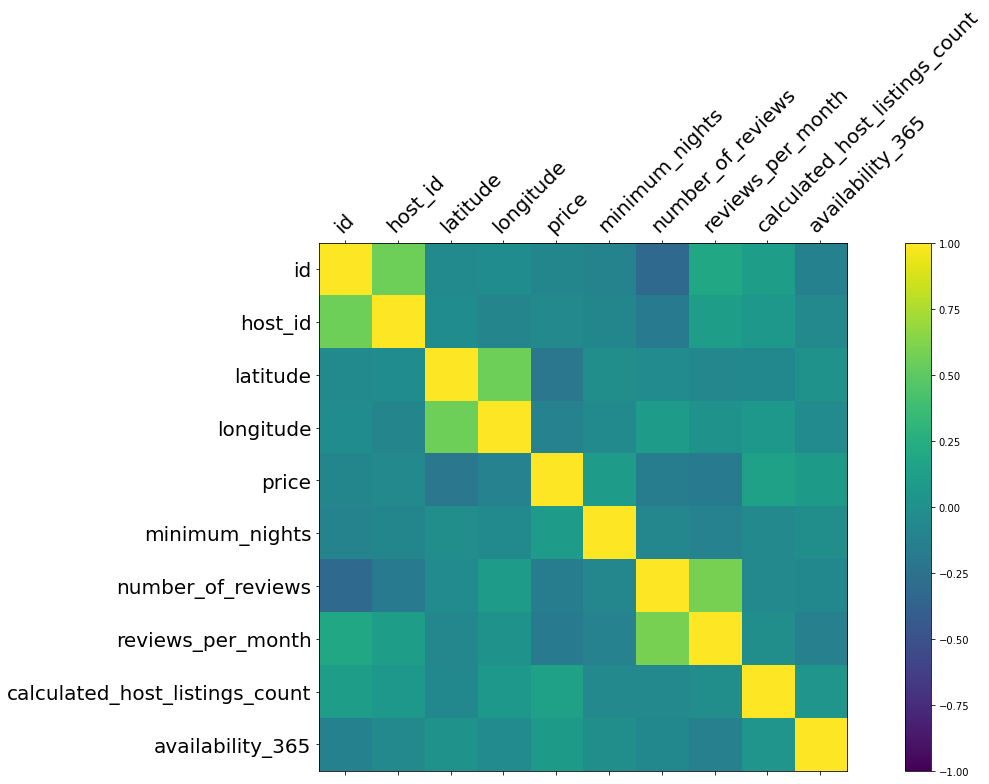

In [44]:
# plotar um heatmap a partir das correlações
# Plot -> indicando o nome das variáveis nos eixos
plt.rcParams["figure.figsize"] = (18,11)
fig = plt.figure()
ax = fig.add_subplot()

cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)

ticks = np.arange(len(correlations))

ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(correlations.columns, fontsize=20)
ax.set_yticklabels(correlations.columns, fontsize=20)

plt.setp(ax.get_xticklabels(), rotation=45, ha="left",
         rotation_mode="anchor")

plt.tight_layout()

Breve interpretação: [para mais informações sobre correlações](https://https://youtu.be/K4MXPV7jX8Q)

Correlação vai de -1 a 1, indicando a força e a direção do relacionamento entre duas vairáveis. Quanto mais próximo do tom "amarelo" mais a variável correlaciona positivamente com a variável que está se relacionando. A linha diagonal siginifica que a variável tem alta correlação com ela mesma.

Lembrando -> **correlação não implica em causalidade**.

#### 4.2.9 Plot
Usando apenas as informações de `latitude` e `longitute` em um plano cartesiano, onde os pontos de dados representa o preço médio, é nítido que temos a visão do litoral do Rio de Janeiro!!!

Legal né!!!

Nas nossas próximas análises, quando voltarmos com esse dataSet transformaremos esse plot em um mapa!!!! Beleza???

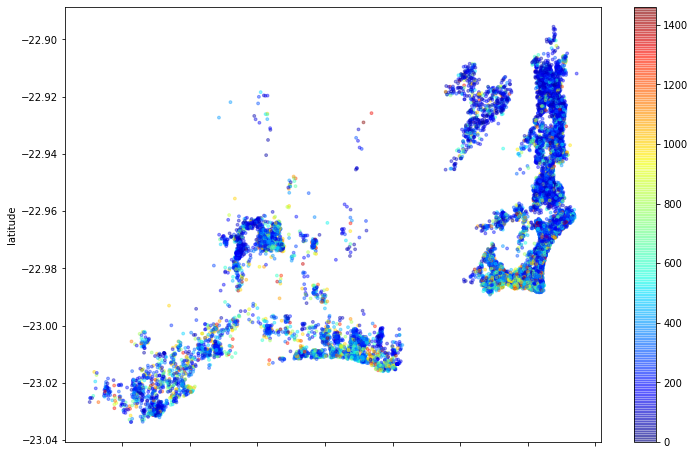

In [45]:
# plotar os imóveis pela latitude-longitude
df_top20.plot(kind= 'scatter', x= 'longitude', y= 'latitude', alpha= 0.4,
            c= df_top20['price'], s= 8, cmap= plt.get_cmap('jet'),
            figsize= (12,8));


## 5. Conclusões

Todo processo de análise em *Data Science* as conclusões são únicas, pois reflete aos dados no contexto do problema de negócio apontado no início do projeto.

O objetivo desse jupyter foi mostrar que *Data Science* não é apenas uso de inteligência artificial, o processo exploratório dos dados, que prepara os mesmos para uso de *Machine Learning* podem render bons insights.

Por exemplo, deste mesmo dataSet podemos fazer um recorte de período e comparar dados de 2019 e 2020 e ver possível impacto da Pandemia do Covid-19 nesse setor de turismo.

Até aqui, descobrimos que para se hospedar na cidade Maravilhosa (com base nos dados compilados até dia 26/01/2021), nos bairros mais ofertados, em média e considerando o período mínimo de hospedagem (3 dias) o turista/usuário do Airbnb despenderá um valor de 1.113,63 `price` * `minimum_nights`.

A medida que a escolha ocorra por bairro, o usuário/turista gastará em média no mínimo os seguintes valores:

|     Bairro      | Vlr Gasto(R$)|
|-----------------|-------------- |
|Lagoa |                      1957.17
Gávea |                      1778.64
Jacarepaguá |                1777.29
Leblon       |               1674.93
Barra da Tijuca|             1669.93
Recreio dos Bandeirantes |   1582.18
Ipanema                   |  1500.10
Camorim          |           1321.05
Jardim Botânico   |          1307.83
Glória             |         1225.18
Flamengo            |        1206.27
Copacabana           |       1156.02
Leme                  |      1145.93
Botafogo               |     1101.13
Vila Isabel             |    1080.16
Laranjeiras              |   1042.66
Tijuca                    |   981.32
Catete         |              834.51
Centro          |             734.01
Santa Teresa     |            711.54

Agora sabemos quanto, em média, poderemos gastar para hospedar no Rio de Janeiro, pelo Airbnb!!




---

